In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from UV_views import *
from Y_views import *
%matplotlib inline

In [2]:
all_hits = pd.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index
all_hits = all_hits[['Index', 'X', 'Y', 'Z', 'TrackID', 'Time', 'StatNb', 'ViewNb', 'PlaneNb', 'LayerNb', 'StrawNb', 'dist2Wire', 'event', 'k']]
all_hits.head()

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k
0,0,8.883409,-61.202305,-1974.859985,3,232.044861,5,0,0,0,319,0.274822,0,0
1,1,8.858191,-61.225544,-1973.742188,3,232.074081,5,0,0,1,320,0.582455,0,1
2,2,8.824563,-61.256523,-1972.251953,3,232.118286,5,0,1,0,319,0.111252,0,2
3,3,8.632817,-61.432972,-1963.756592,3,232.406479,5,1,0,1,320,0.164412,0,3
4,4,8.573978,-61.487133,-1961.149292,3,232.488541,5,1,1,1,320,0.226827,0,4


In [3]:
match_table = {}
for i in all_hits.Index:
    match_table[all_hits.Index[i]] = all_hits.TrackID[i]

In [8]:
def YZ_efficiency(event_set, ind):
    arr = []
    for event in event_set:
        event0 = all_hits[all_hits['event'] == event]
        if (ind):
            event0 = modify_for_yz_analysis_3_4(event0)
        else:
            event0 = modify_for_yz_analysis_1_2(event0)

        tracks, linking_table = loop_yz(event0, 7, 0.85, ind)
        for i in linking_table:
            per = {}
            for j in linking_table[i]:
                per[match_table[j]] = 0
            for j in linking_table[i]:
                per[match_table[j]] += 1
            if (len(linking_table[i]) > 0):
                arr.append(1.0 * max(per.values()) / len(linking_table[i]))
    plt.hist(arr)

In [9]:
def XZ_efficiency(event_set, ind):
    arr = []
    for event in event_set:
        event0 = all_hits[all_hits['event'] == event]
        if (ind):
            event1 = modify_for_yz_analysis_3_4(event0)
            event2 = modify_for_xz_analysis_3_4(event0)
        else:
            event1 = modify_for_yz_analysis_1_2(event0)
            event2 = modify_for_xz_analysis_1_2(event0)
        
        tracks, linking_table = loop_yz(event1, 7, 0.85, ind)
        new_tracks, new_linking_table, Xs = loop_xz(event2, tracks, linking_table, 6, 15, ind)
        for i in new_linking_table:
            per = {}
            for j in new_linking_table[i]:
                per[match_table[j]] = 0
            for j in new_linking_table[i]:
                per[match_table[j]] += 1
            if (len(new_linking_table[i]) > 0):
                arr.append(1.0 * max(per.values()) / len(new_linking_table[i]))
    plt.hist(arr)

# YZ efficiency 1 & 2 stations

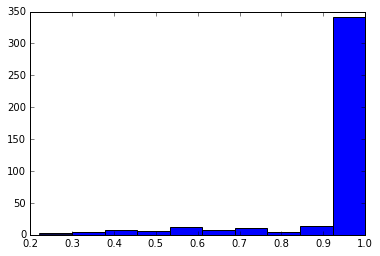

In [18]:
YZ_efficiency(range(3, 600), 0)

# YZ efficiency 3 & 4 stations

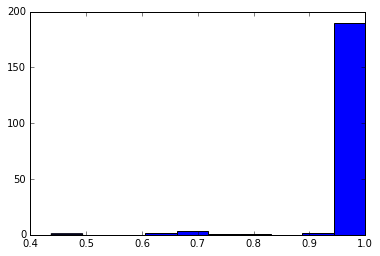

In [19]:
YZ_efficiency(range(3, 600), 1)

#  XZ efficiency 1 & 2 stations

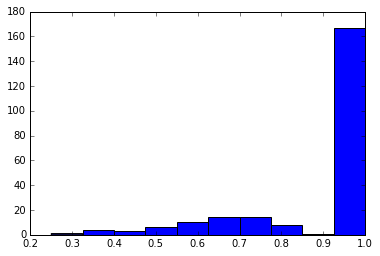

In [20]:
XZ_efficiency(range(3, 600), 0)

# XZ efficiency 3 & 4 stations

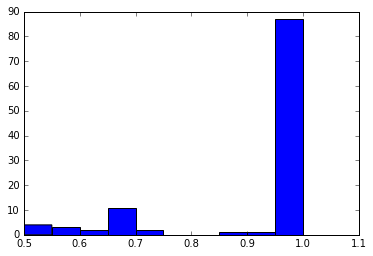

In [21]:
XZ_efficiency(range(3,600), 1)